
## Importing Necessary Libraries

In [ ]:
import numpy as np
import random
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras import models
from keras.metrics import Precision, Recall
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

## Loading MNIST Dataset

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Original Shapes:")
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
Original Shapes:
Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


##  Split the test data into validation and test sets

In [ ]:
split_index = len(test_images) // 2

validation_images = test_images[:split_index]
validation_labels = test_labels[:split_index]
test_images = test_images[split_index:]
test_labels = test_labels[split_index:]

print("\nSplit Shapes:")
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Validation Images Shape:", validation_images.shape)
print("Validation Labels Shape:", validation_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


Split Shapes:
Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Validation Images Shape: (5000, 28, 28)
Validation Labels Shape: (5000,)
Test Images Shape: (5000, 28, 28)
Test Labels Shape: (5000,)


## Displaying an Image with Label

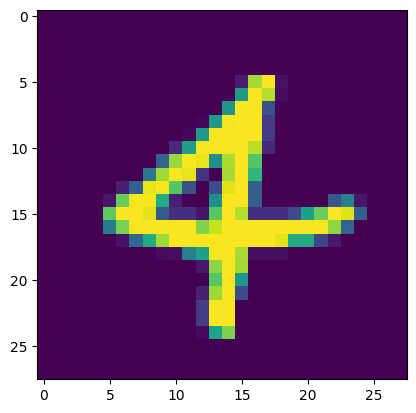

4


In [ ]:
plt.imshow(train_images[150,:,:])
plt.show()
print(train_labels[150])

## Displaying Random Images with Labels

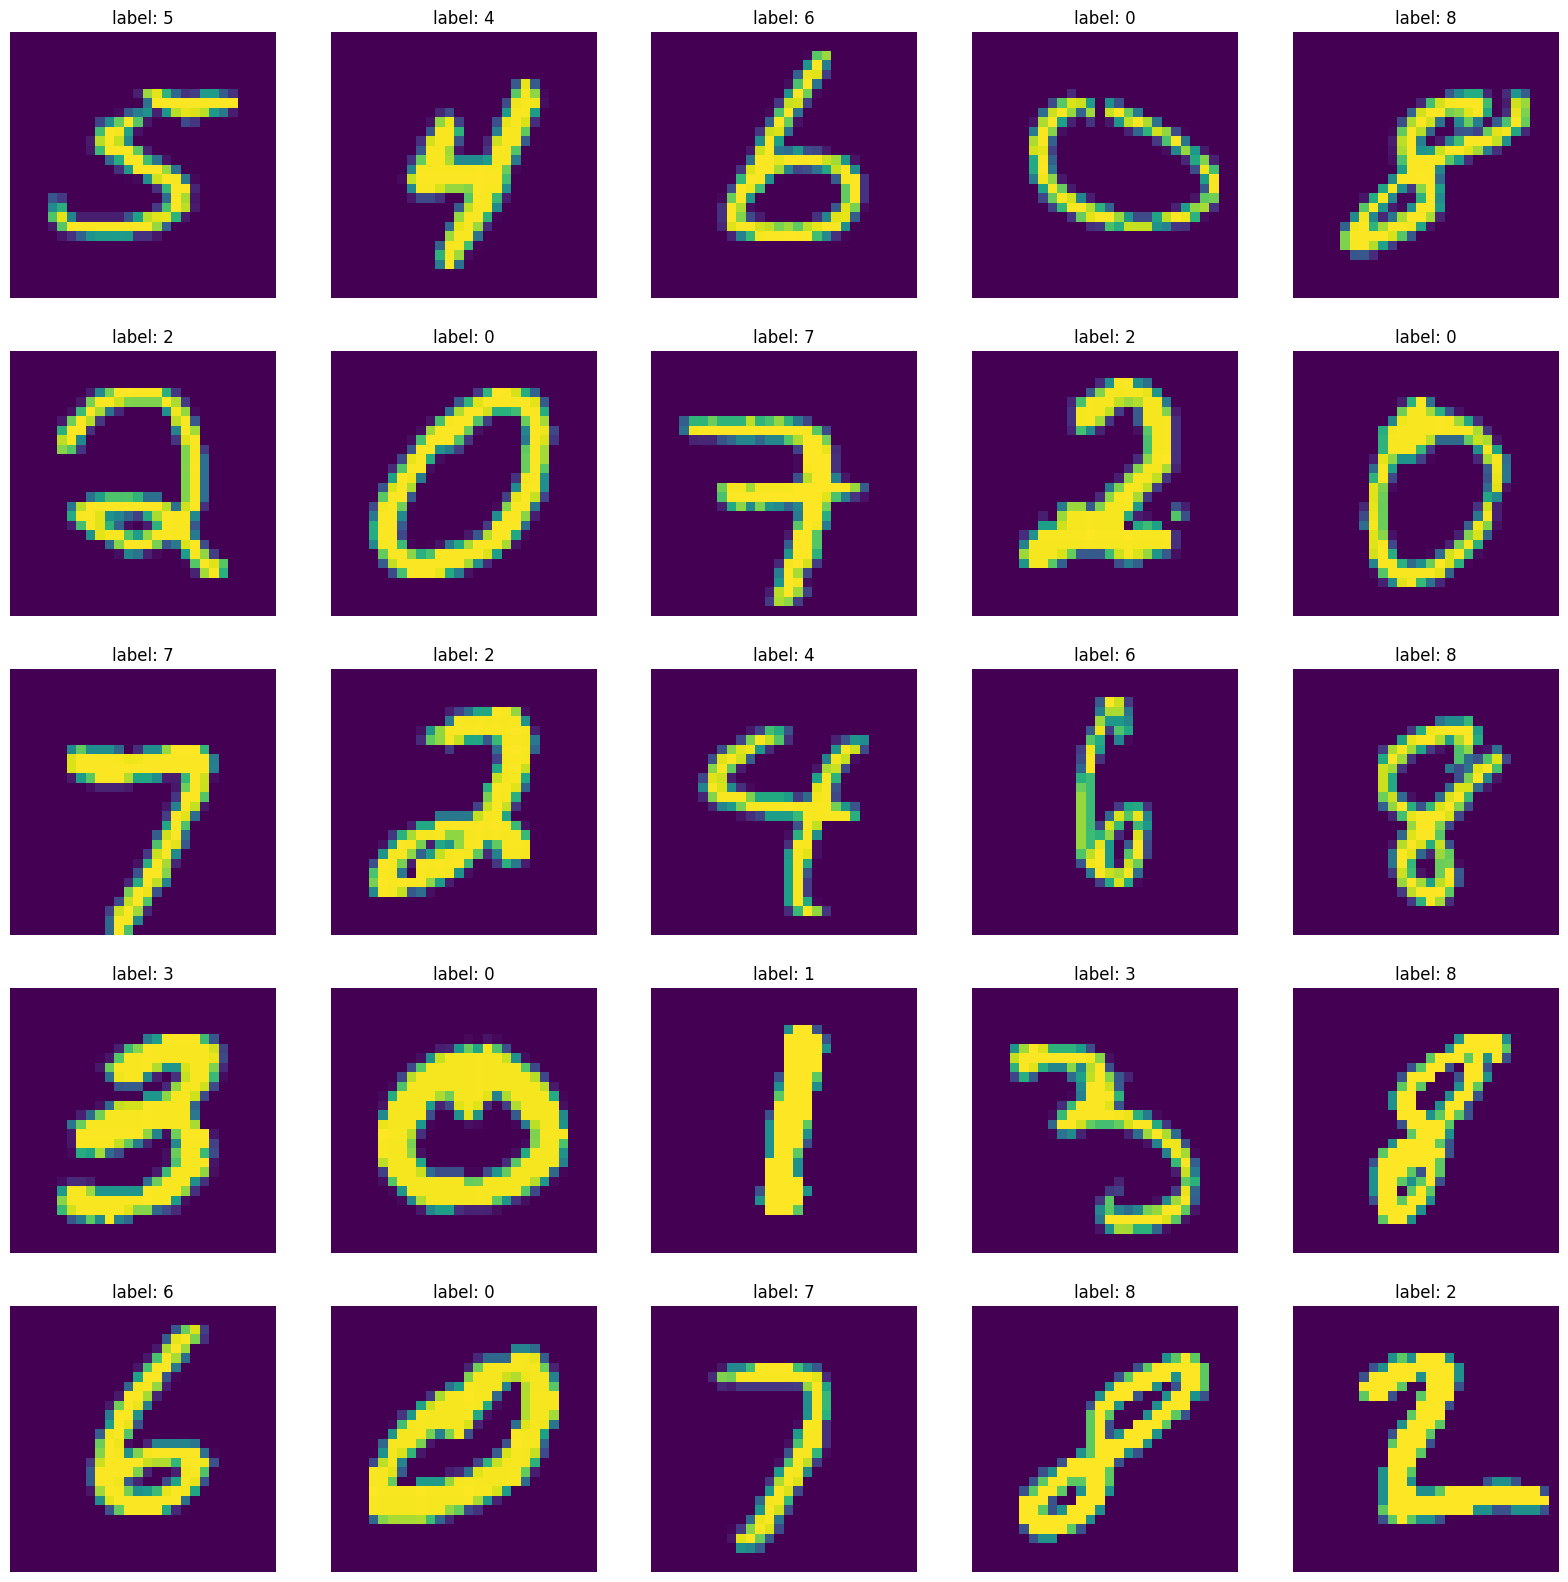

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(25):
    random_idx = random.randint(0, len(train_images))
    image = train_images[random_idx]
    plt.subplot(5, 5, i+1)
    plt.imshow(image.squeeze())
    plt.title("label: " + str(train_labels[random_idx]))
    plt.axis("off")

## Preprocessing Data

In [ ]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

validation_images = validation_images.reshape((split_index, 28, 28, 1))
validation_images = validation_images.astype('float32') / 255

test_images = test_images.reshape((split_index,28,28,1))
test_images = test_images.astype('float32')/255



## One-hot encoding Training-Testing Labels

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

## Shapes of Data after One-hot encoding

In [ ]:
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Validation Images Shape:", validation_images.shape)
print("Validation Labels Shape:", validation_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

Training Images Shape: (60000, 28, 28, 1)
Training Labels Shape: (60000, 10)
Validation Images Shape: (5000, 28, 28, 1)
Validation Labels Shape: (5000, 10)
Test Images Shape: (5000, 28, 28, 1)
Test Labels Shape: (5000, 10)


## Image with encoded Label

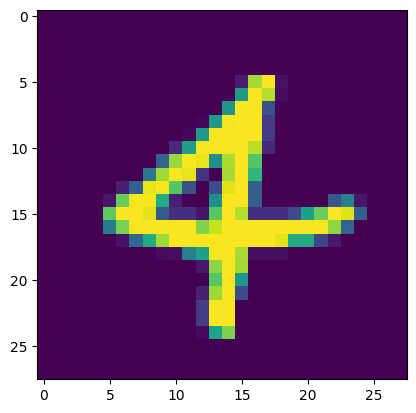

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
plt.imshow(train_images[150,:,:])
plt.show()
print(train_labels[150])

## Displaying Random Images with encoded Labels

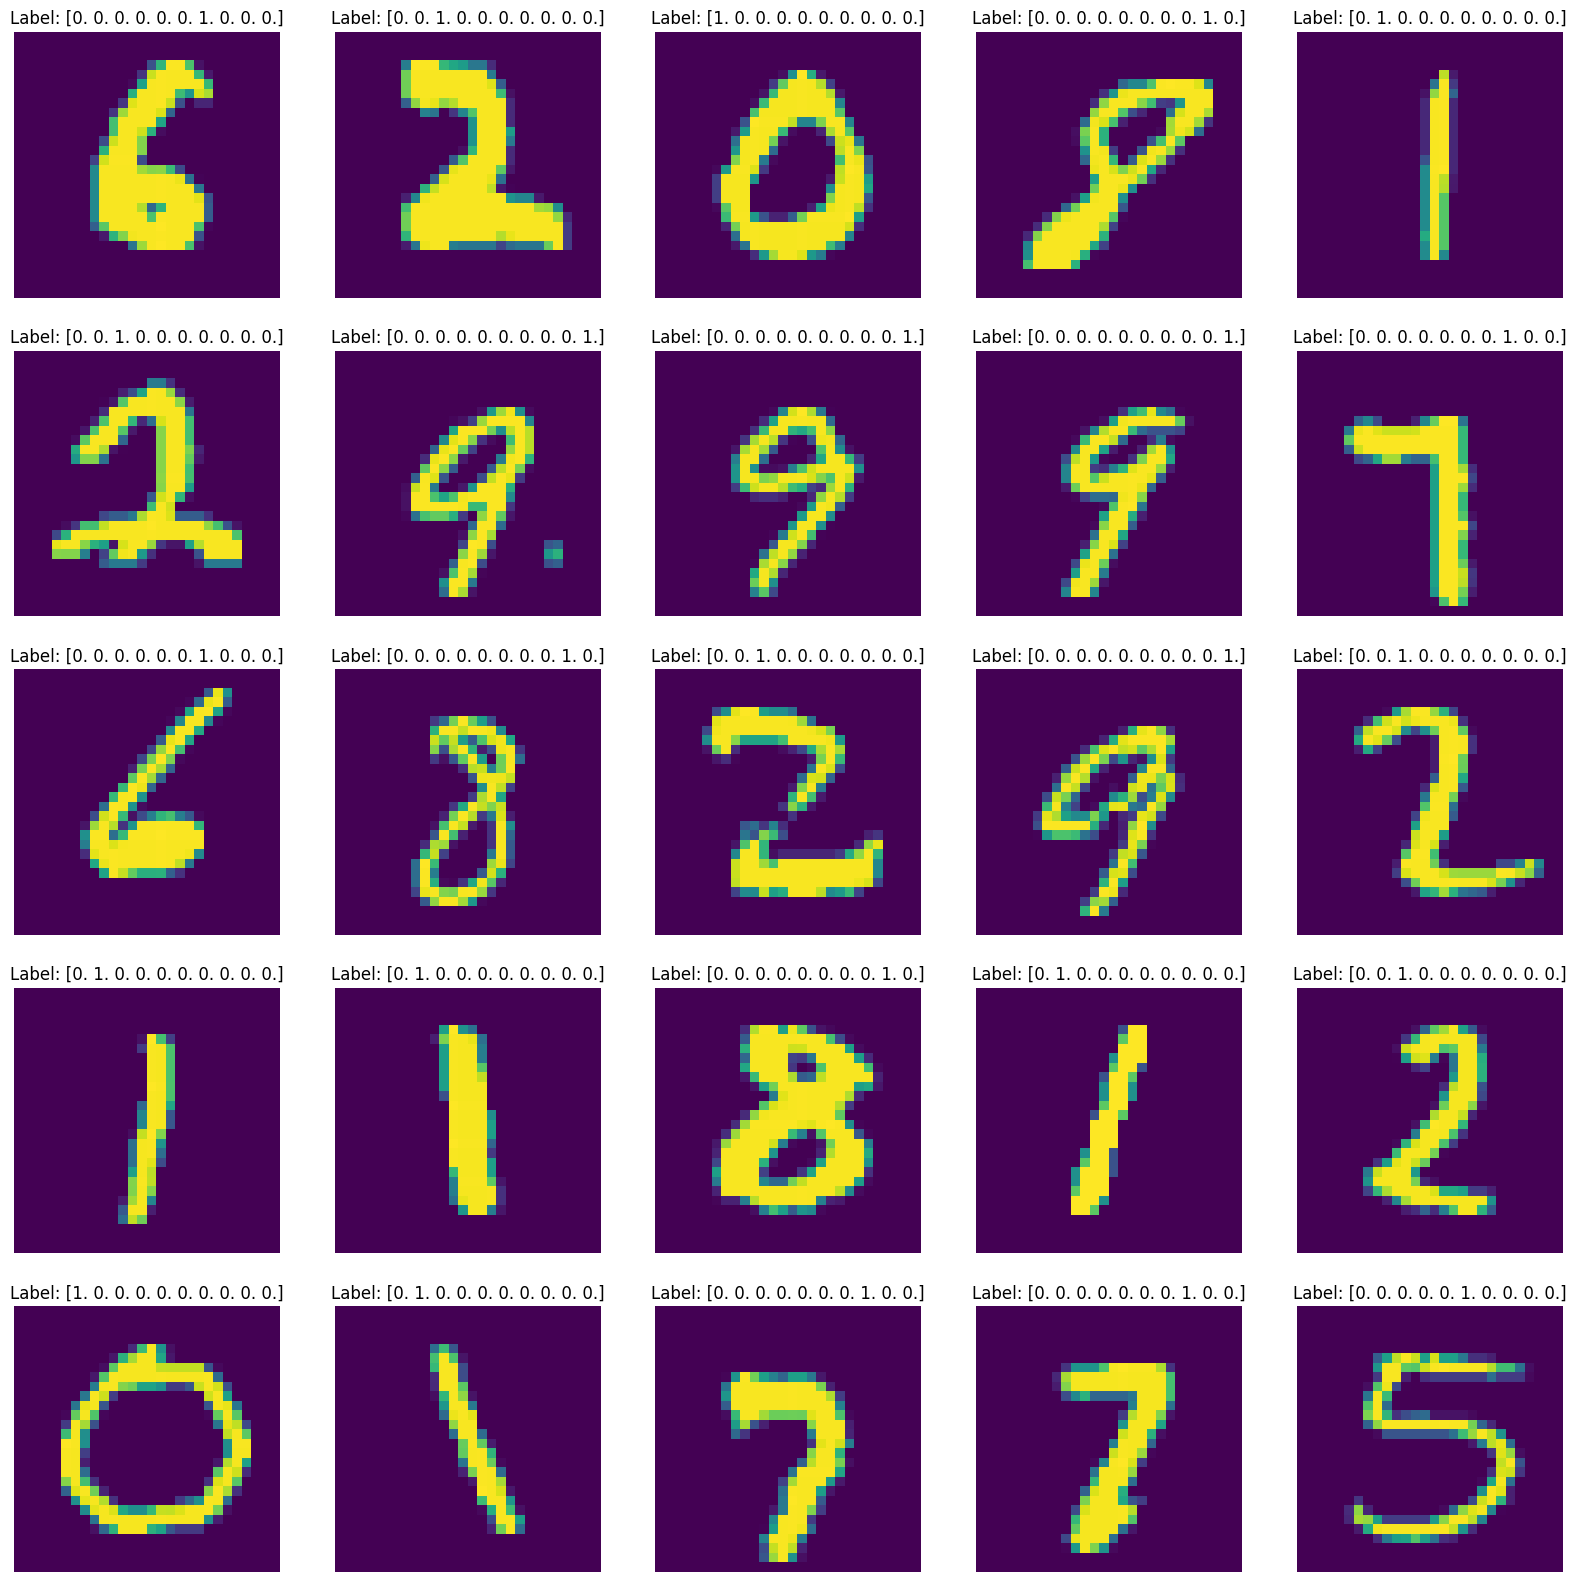

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(25):
    random_idx = random.randint(0, len(train_images) - 1)
    image = train_images[random_idx]
    label = train_labels[random_idx]
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)
    plt.title("Label: " + str(label))
    plt.axis("off")

plt.show()


## Convolutional Neural Network (CNN) Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(2,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 13, 13, 2)         0         
 ng2D)                                                           
                                                                 
 flatten_19 (Flatten)        (None, 338)               0         
                                                                 
 dense_38 (Dense)            (None, 10)                3390      
                                                                 
Total params: 3410 (13.32 KB)
Trainable params: 3410 (13.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


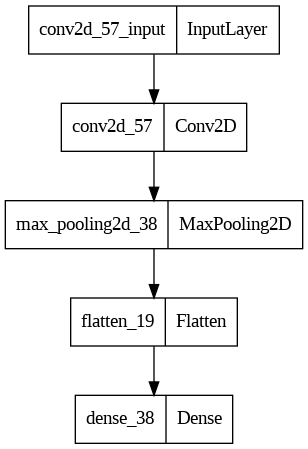

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_model = model.fit(train_images, train_labels, epochs=5, batch_size=1024, validation_data=(validation_images, validation_labels))

Epoch 1/5
59/59 [==============================] - 9s 136ms/step - loss: 2.2603 - accuracy: 0.1635 - val_loss: 2.1582 - val_accuracy: 0.2386
Epoch 2/5
59/59 [==============================] - 9s 146ms/step - loss: 1.9830 - accuracy: 0.3908 - val_loss: 1.7962 - val_accuracy: 0.5470
Epoch 3/5
59/59 [==============================] - 7s 126ms/step - loss: 1.4791 - accuracy: 0.6366 - val_loss: 1.2613 - val_accuracy: 0.6744
Epoch 4/5
59/59 [==============================] - 11s 182ms/step - loss: 1.0084 - accuracy: 0.7401 - val_loss: 0.9255 - val_accuracy: 0.7448
Epoch 5/5
59/59 [==============================] - 9s 146ms/step - loss: 0.7657 - accuracy: 0.7896 - val_loss: 0.7618 - val_accuracy: 0.7840


In [ ]:
predictions = model.predict(train_images)
f1 = f1_score(np.argmax(train_labels, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("F1 Score:", f1)
model.evaluate(train_images, train_labels)[1]

1875/1875 [==============================] - 8s 4ms/step
F1 Score: 0.8055152745894912
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6900 - accuracy: 0.8068


0.8068333268165588

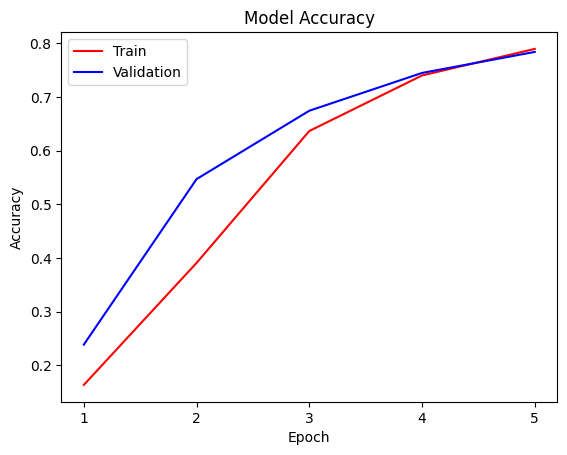

In [ ]:
epochs = range(1, len(train_model.history['accuracy']) + 1)
plt.plot(epochs, train_model.history['accuracy'], color='red', label='Train')
plt.plot(epochs, train_model.history['val_accuracy'], color='blue', label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(epochs) + 1))
plt.legend()
plt.show()

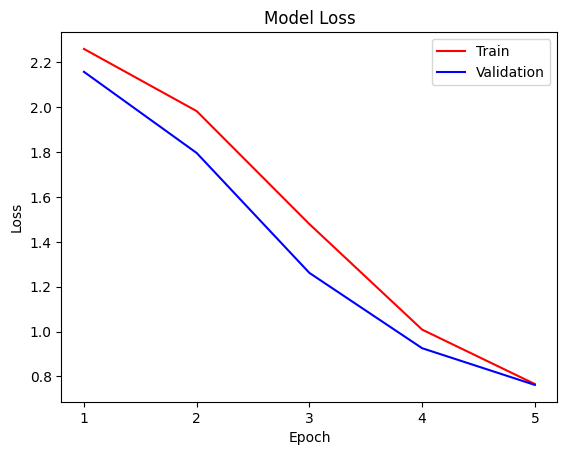

In [ ]:
epochs = range(1, len(train_model.history['loss']) + 1)
plt.plot(epochs, train_model.history['loss'], color='red', label='Train')
plt.plot(epochs, train_model.history['val_loss'], color='blue', label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(epochs) + 1))
plt.legend()
plt.show()

1/1 [==============================] - 0s 23ms/step


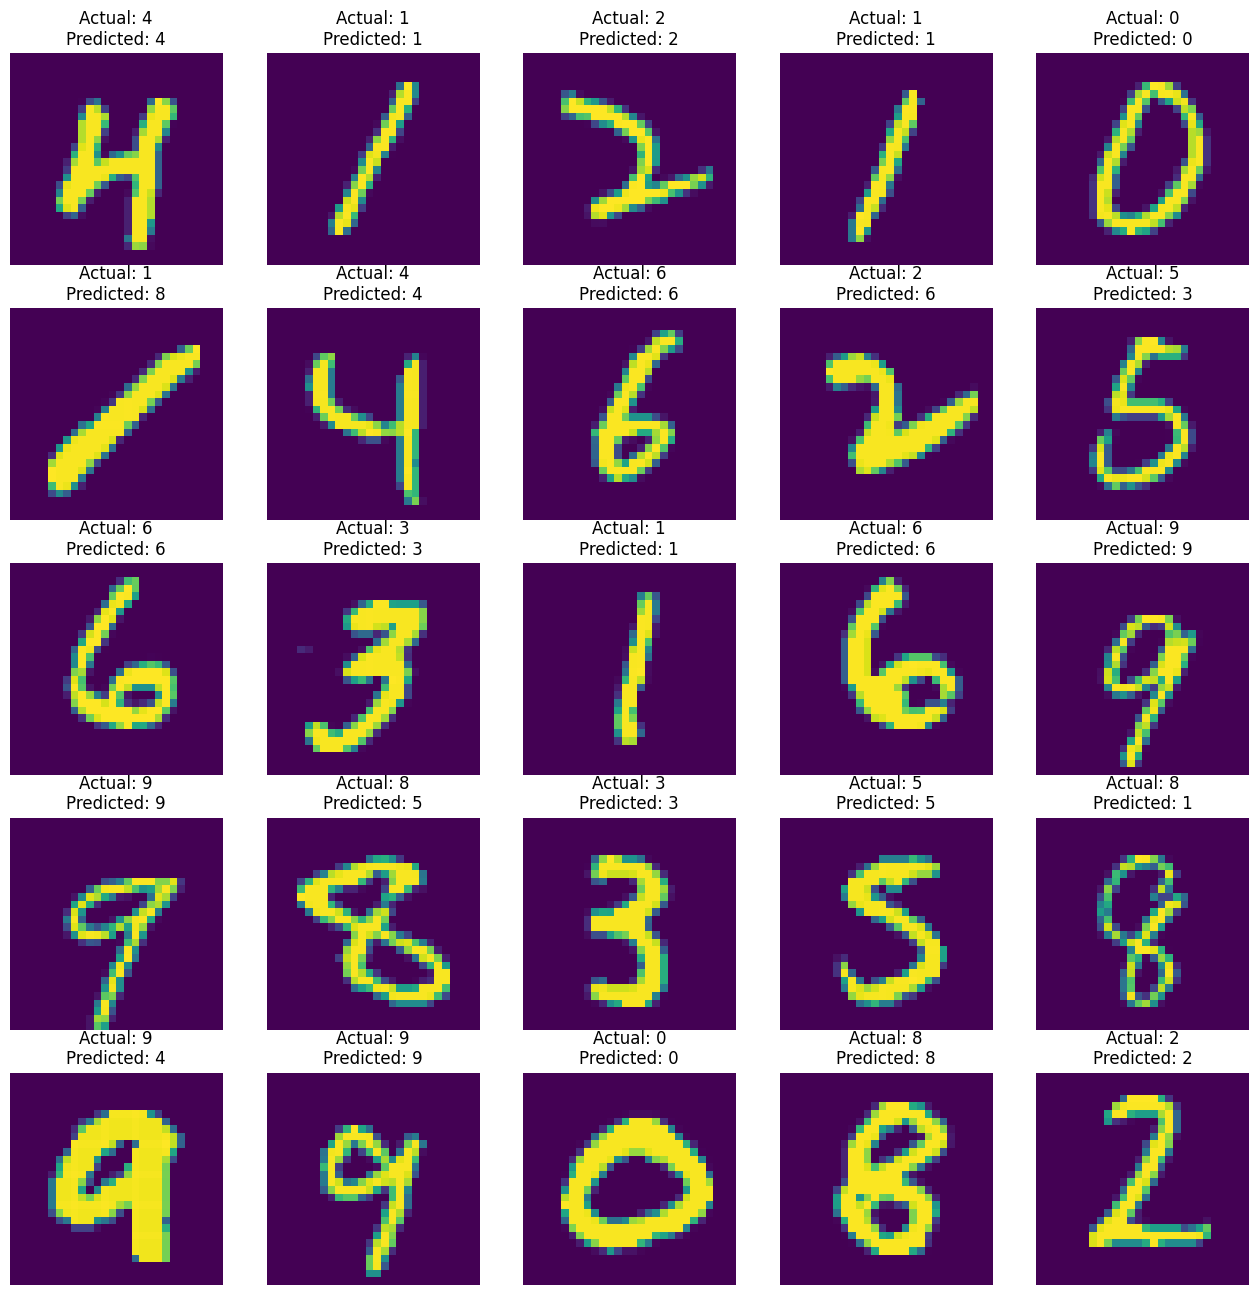

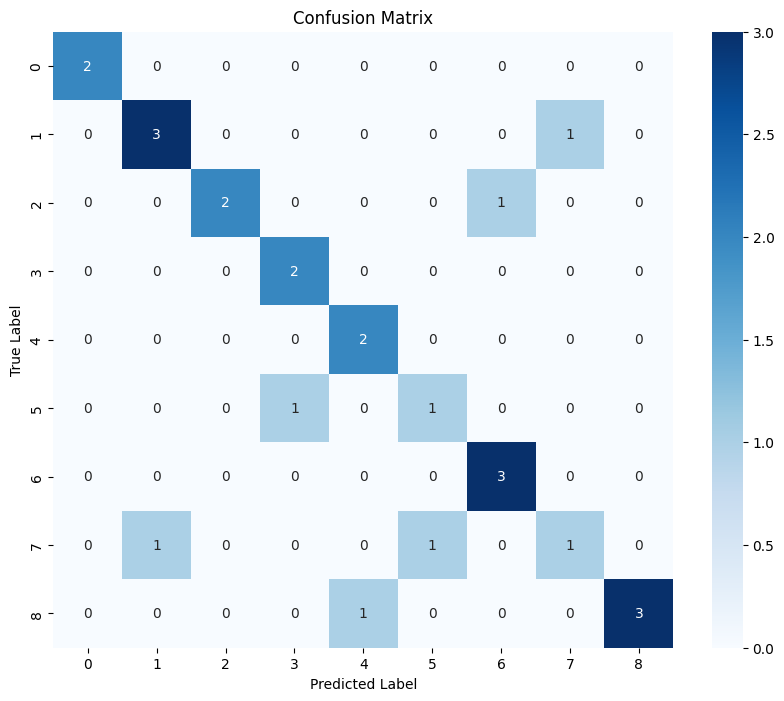

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(16, 16))

all_actual_labels = []
all_predicted_labels = []

for i in range(num_images):
    random_idx = random.randint(0, len(train_images) - 1)
    random_train_image = train_images[random_idx]

    row_idx = i // num_cols
    col_idx = i % num_cols

    # Display the randomly selected train image in the appropriate subplot
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(random_train_image.squeeze())

    # Add batch dimension to the single train image
    single_train_image = np.expand_dims(random_train_image, axis=0)

    # Predict using the model
    predictions = model.predict(single_train_image)
    predicted_class = np.argmax(predictions)

    actual_label = np.argmax(train_labels[random_idx])
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_class}")

    plt.axis("off")

    all_actual_labels.append(actual_label)
    all_predicted_labels.append(predicted_class)

plt.show()


conf_matrix = confusion_matrix(all_actual_labels, all_predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1875/1875 [==============================] - 8s 4ms/step


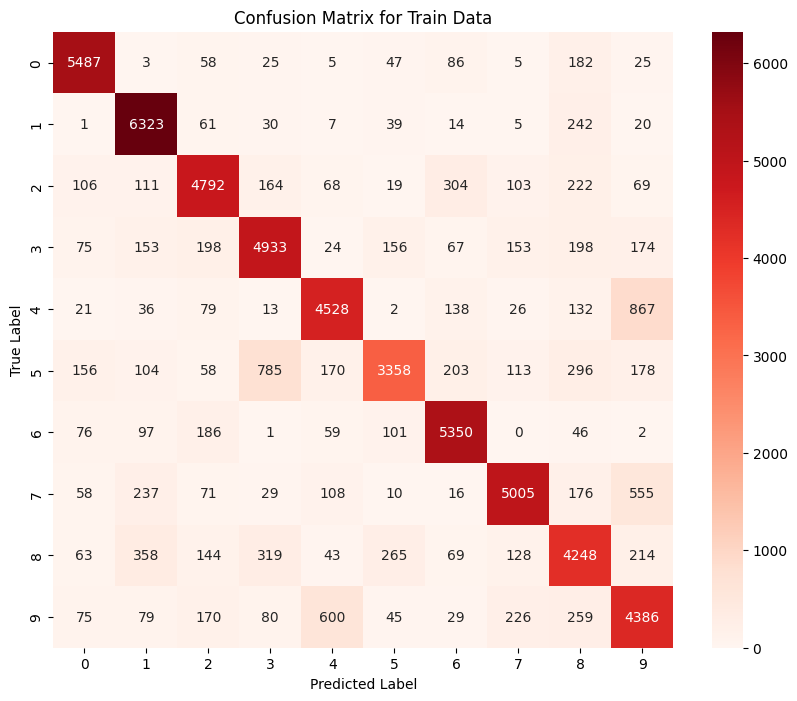

In [ ]:
# Predict labels
all_predictions = model.predict(train_images)
predicted_labels = np.argmax(all_predictions, axis=1)

#  true labels
true_labels = np.argmax(train_labels, axis=1)

# confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Train Data')
plt.show()

---
#    **Home_Work**





## Convolutional Neural Network (CNN) Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_20 (Flatten)        (None, 576)             

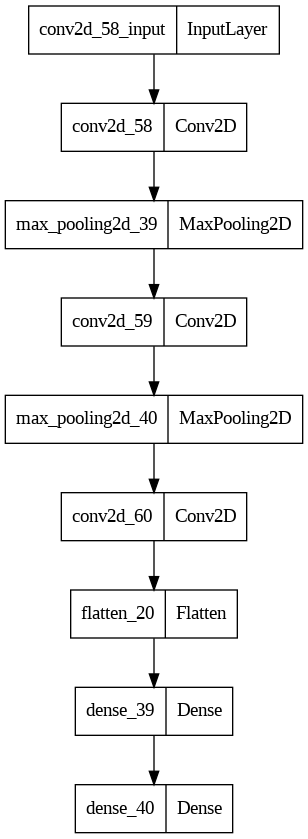

In [ ]:
from keras.utils import plot_model
plot_model(model)

## Compiling the Model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])


## Model Training

In [ ]:
train_model = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Epoch 1/5
938/938 [==============================] - 50s 52ms/step - loss: 0.1727 - accuracy: 0.9464 - precision: 0.9678 - recall: 0.9295 - val_loss: 0.0810 - val_accuracy: 0.9734 - val_precision: 0.9770 - val_recall: 0.9700
Epoch 2/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0461 - accuracy: 0.9857 - precision: 0.9875 - recall: 0.9846 - val_loss: 0.0652 - val_accuracy: 0.9790 - val_precision: 0.9809 - val_recall: 0.9774
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0324 - accuracy: 0.9901 - precision: 0.9910 - recall: 0.9894 - val_loss: 0.0484 - val_accuracy: 0.9830 - val_precision: 0.9853 - val_recall: 0.9808
Epoch 4/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0245 - accuracy: 0.9924 - precision: 0.9929 - recall: 0.9919 - val_loss: 0.0604 - val_accuracy: 0.9816 - val_precision: 0.9830 - val_recall: 0.9808
Epoch 5/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0199 - accuracy: 0.9940

##   Model Performance on Test Dataset

In [ ]:
predictions = model.predict(test_images)
f1 = f1_score(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("F1 Score:", f1)
model.evaluate(test_images, test_labels)[1]

157/157 [==============================] - 1s 8ms/step
F1 Score: 0.9954001010115328
157/157 [==============================] - 1s 8ms/step - loss: 0.0121 - accuracy: 0.9954 - precision: 0.9954 - recall: 0.9952


0.9954000115394592

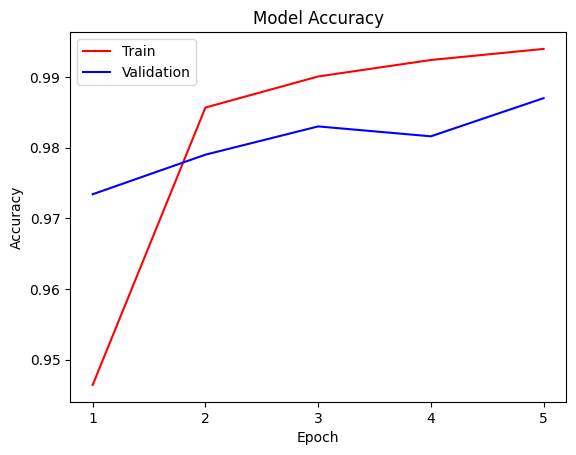

In [ ]:
epochs = range(1, len(train_model.history['accuracy']) + 1)
plt.plot(epochs, train_model.history['accuracy'], color='red', label='Train')
plt.plot(epochs, train_model.history['val_accuracy'], color='blue', label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(epochs) + 1))
plt.legend()
plt.show()

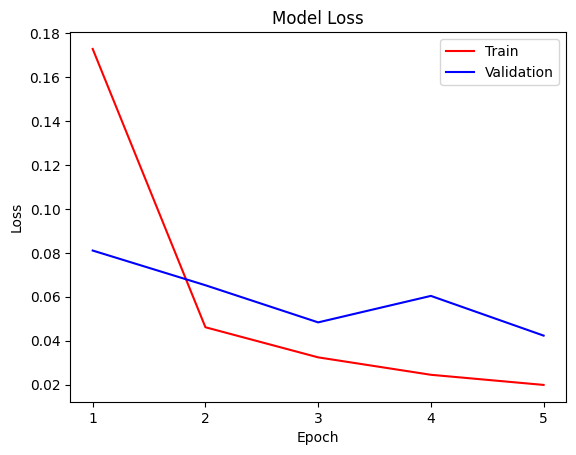

In [ ]:
epochs = range(1, len(train_model.history['loss']) + 1)
plt.plot(epochs, train_model.history['loss'], color='red', label='Train')
plt.plot(epochs, train_model.history['val_loss'], color='blue', label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(epochs) + 1))
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


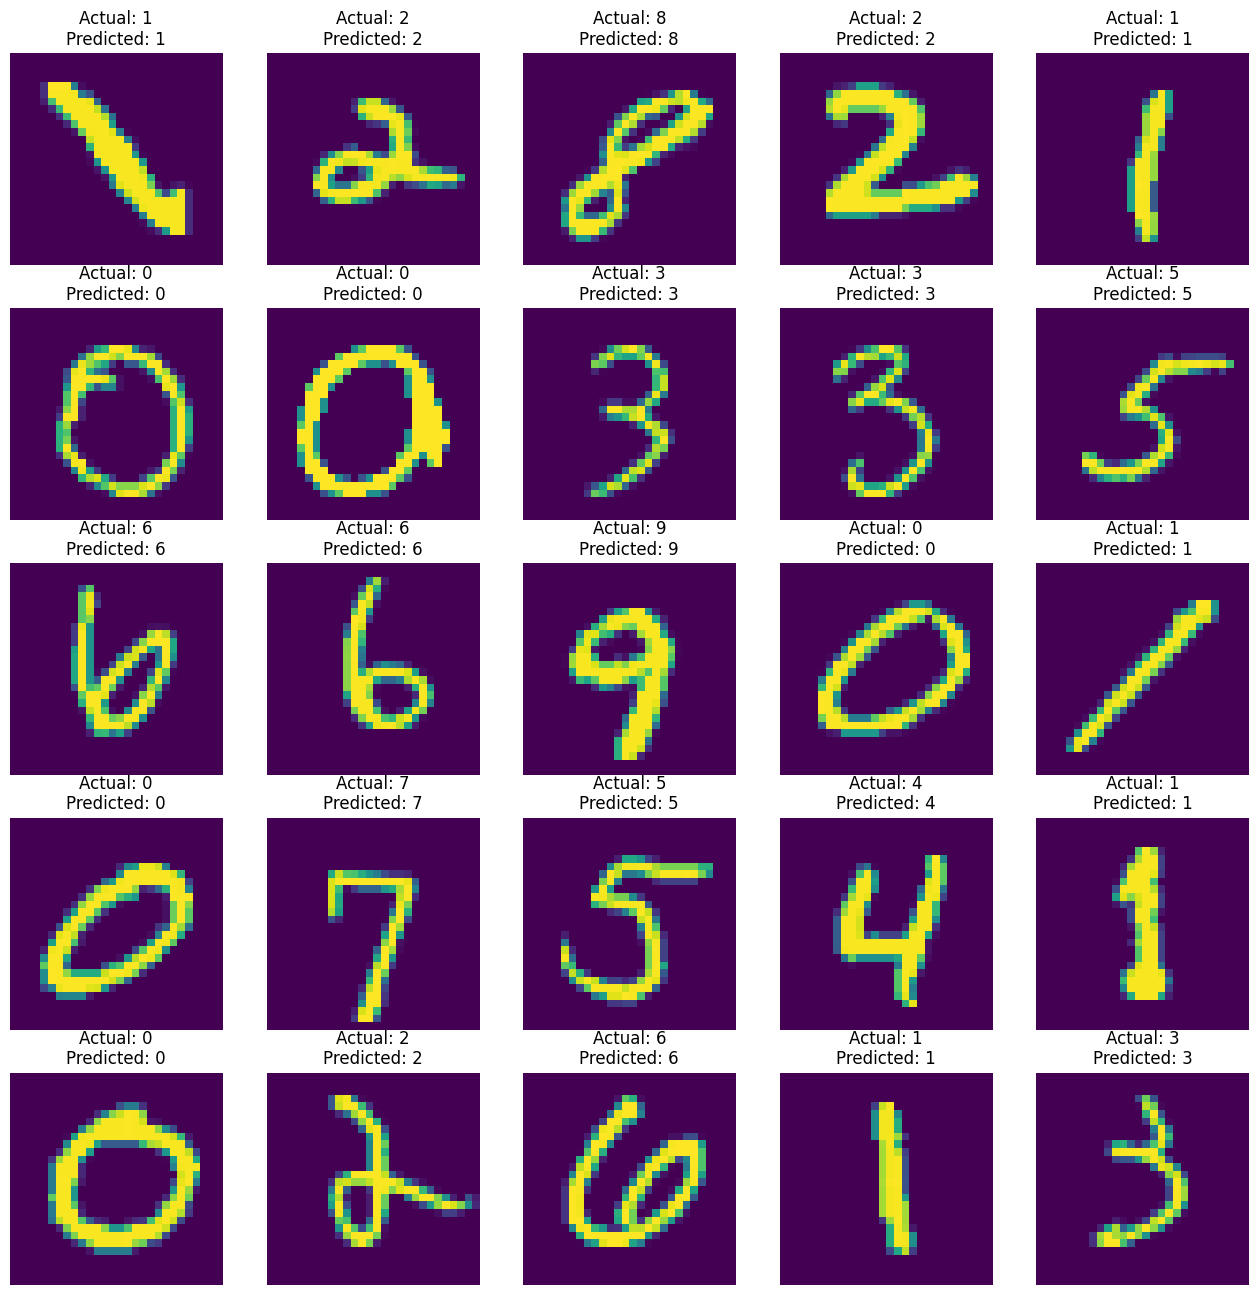

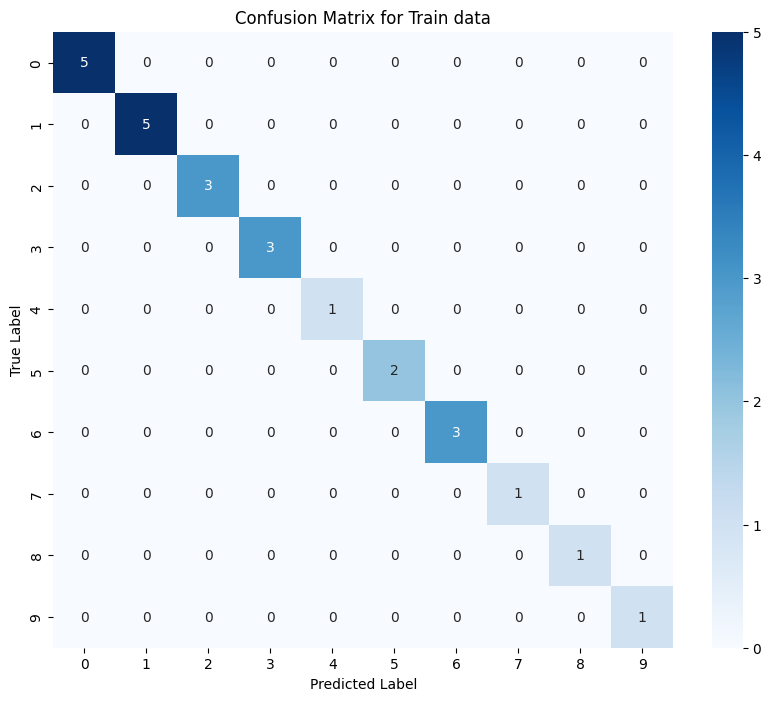

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(16, 16))

all_actual_labels = []
all_predicted_labels = []

for i in range(num_images):
    random_idx = random.randint(0, len(train_images) - 1)
    random_train_image = train_images[random_idx]

    row_idx = i // num_cols
    col_idx = i % num_cols

    # Display the randomly selected train image in the appropriate subplot
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(random_train_image.squeeze())

    # Add batch dimension to the single train image
    single_train_image = np.expand_dims(random_train_image, axis=0)

    # Predict using the model
    predictions = model.predict(single_train_image)
    predicted_class = np.argmax(predictions)

    actual_label = np.argmax(train_labels[random_idx])
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_class}")

    plt.axis("off")

    all_actual_labels.append(actual_label)
    all_predicted_labels.append(predicted_class)

plt.show()


conf_matrix = confusion_matrix(all_actual_labels, all_predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Train data')
plt.show()


1875/1875 [==============================] - 16s 9ms/step


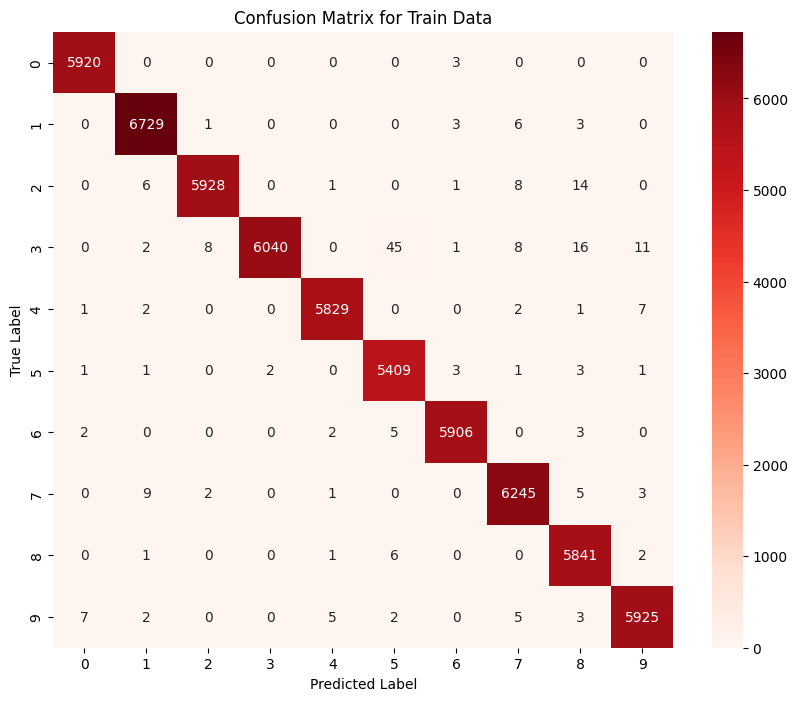

In [ ]:
# Predict labels
all_predictions = model.predict(train_images)
predicted_labels = np.argmax(all_predictions, axis=1)

#  true labels
true_labels = np.argmax(train_labels, axis=1)

# confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Train Data')
plt.show()

---
# **Exam**

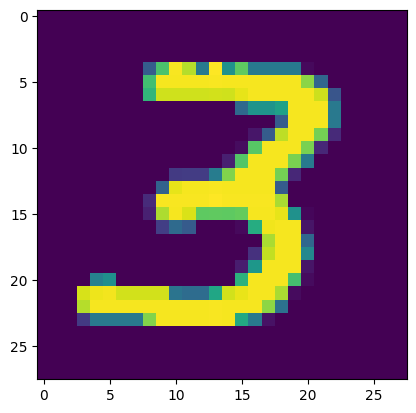

Shape of inpute image (1, 28, 28, 1)
1/1 [==============================] - 0s 81ms/step
Predicted Class: 3


In [ ]:
plt.imshow(test_images[150,:,:])
plt.show()
single_test_image = np.expand_dims(test_images[150,:,:], axis=0)
print("Shape of inpute image",single_test_image.shape)
predictions = model.predict(single_test_image)
predicted_class = np.argmax(predictions)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 32ms/step


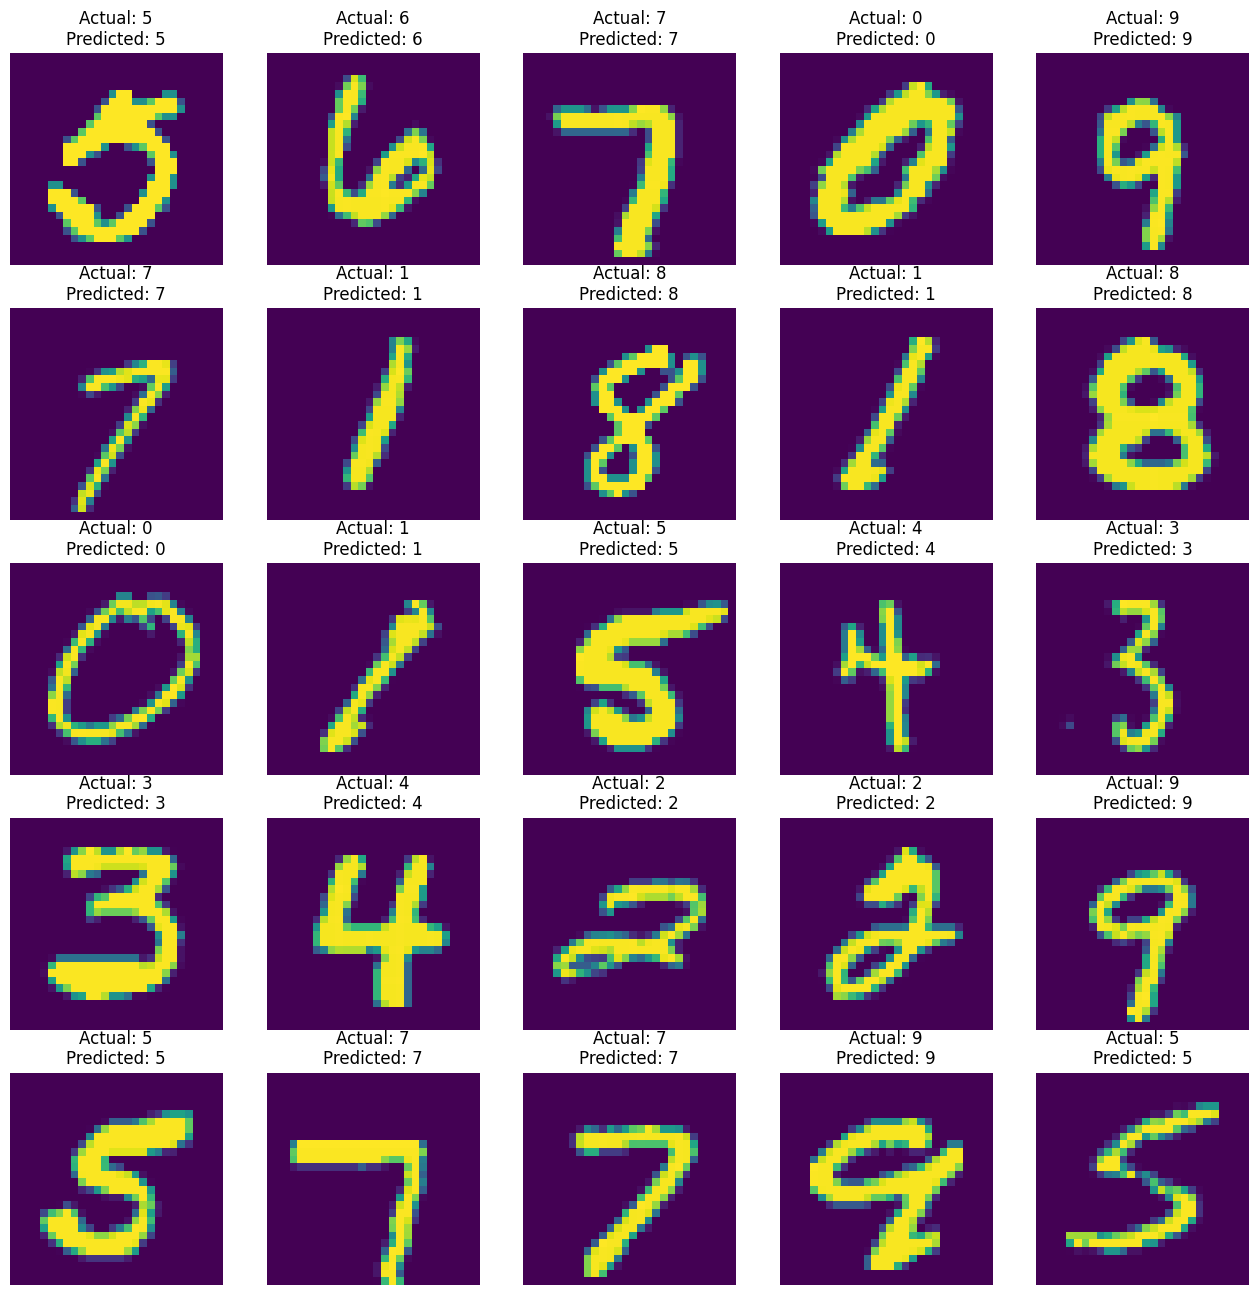

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(16, 16))

all_actual_labels = []
all_predicted_labels = []

for i in range(num_images):
    random_idx = random.randint(0, len(test_images) - 1)
    random_test_image = test_images[random_idx]

    row_idx = i // num_cols
    col_idx = i % num_cols

    # Display the randomly selected test image in the appropriate subplot
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(random_test_image.squeeze())

    # Add batch dimension to the single test image
    single_test_image = np.expand_dims(random_test_image, axis=0)

    # Predict using the model
    predictions = model.predict(single_test_image)
    predicted_class = np.argmax(predictions)

    actual_label = np.argmax(test_labels[random_idx])
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_class}")

    plt.axis("off")

    all_actual_labels.append(actual_label)
    all_predicted_labels.append(predicted_class)

plt.show()



157/157 [==============================] - 1s 8ms/step


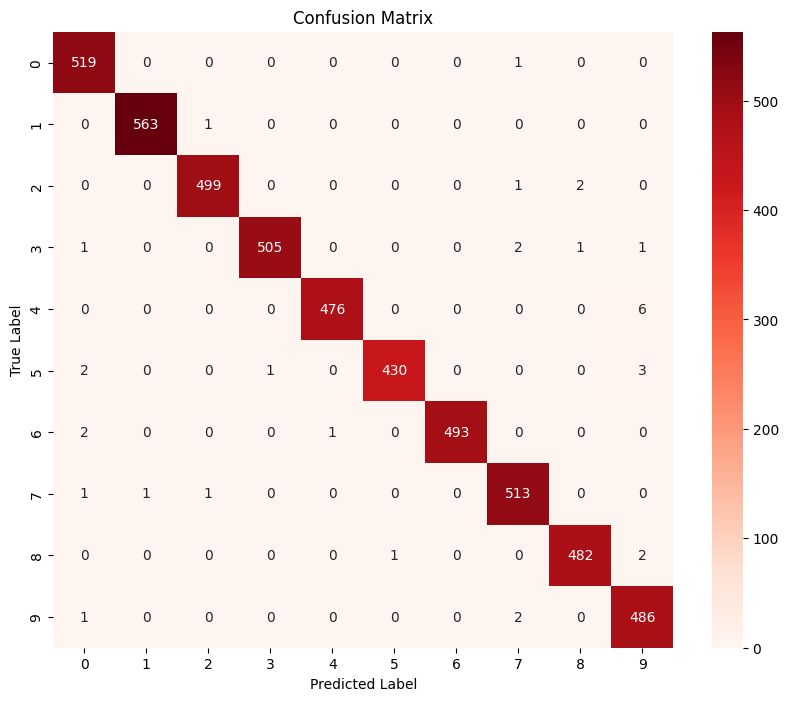

In [ ]:
# Predict labels
all_predictions = model.predict(test_images)
predicted_labels = np.argmax(all_predictions, axis=1)

#  true labels
true_labels = np.argmax(test_labels, axis=1)

# confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Data')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Number of folds
k_folds = 3
validation_accuracies = []

# Initialize KFold object
kf = KFold(n_splits=k_folds, shuffle=True)

#  CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Iterate through the folds
for fold, (train_index, val_index) in enumerate(kf.split(train_images)):
    X_train, X_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # CNN model
    model = create_cnn_model()

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=256, validation_data=(X_val, y_val))

    # Collect validation accuracy for each epoch
    val_acc_per_epoch = history.history['val_accuracy']
    print(f'Fold {fold + 1}: Validation Accuracy = {val_acc_per_epoch[-1]}')
    validation_accuracies.append(val_acc_per_epoch)


Epoch 1/5
157/157 [==============================] - 62s 376ms/step - loss: 0.4533 - accuracy: 0.8716 - val_loss: 0.1207 - val_accuracy: 0.9650
Epoch 2/5
157/157 [==============================] - 51s 327ms/step - loss: 0.0927 - accuracy: 0.9721 - val_loss: 0.0850 - val_accuracy: 0.9743
Epoch 3/5
157/157 [==============================] - 37s 235ms/step - loss: 0.0660 - accuracy: 0.9801 - val_loss: 0.0895 - val_accuracy: 0.9714
Epoch 4/5
157/157 [==============================] - 38s 245ms/step - loss: 0.0527 - accuracy: 0.9840 - val_loss: 0.0637 - val_accuracy: 0.9800
Epoch 5/5
157/157 [==============================] - 38s 240ms/step - loss: 0.0415 - accuracy: 0.9877 - val_loss: 0.0489 - val_accuracy: 0.9850
Fold 1: Validation Accuracy = 0.9850000143051147
Epoch 1/5
157/157 [==============================] - 37s 226ms/step - loss: 0.4752 - accuracy: 0.8611 - val_loss: 0.1540 - val_accuracy: 0.9517
Epoch 2/5
157/157 [==============================] - 42s 270ms/step - loss: 0.1024 - ac

1/1 [==============================] - 0s 141ms/step


<ipython-input-18-d9151f87d2d4>:31: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


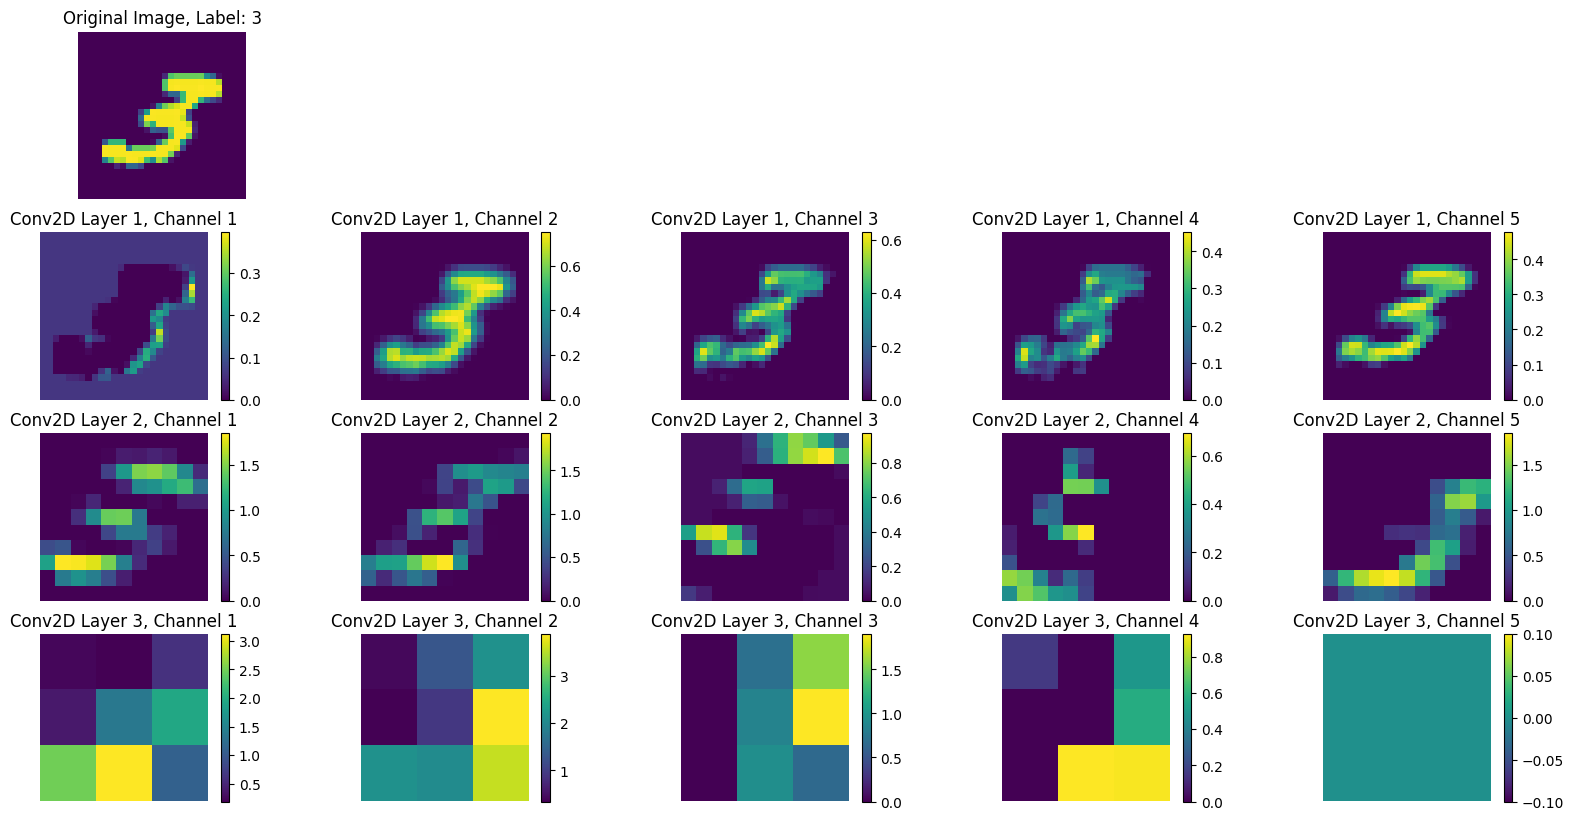

In [ ]:
# Extract the outputs of the intermediate Conv2D layers
intermediate_layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
intermediate_model = Model(inputs=model.input, outputs=intermediate_layer_outputs)

# Visualize outputs of some Conv2D layers for a random image
random_index = np.random.randint(0, len(X_val))
image = X_val[random_index]
label = y_val[random_index]

image = np.expand_dims(image, axis=0)  # Add batch dimension
intermediate_outputs = intermediate_model.predict(image)

plt.figure(figsize=(20, 10))

# Plot the original image with its label
plt.subplot(4, 4, 1)
plt.imshow(X_val[random_index].reshape(28, 28))
plt.title(f'Original Image, Label: {np.argmax(label)}')
plt.axis('off')

# Plot the outputs of Conv2D layers
for i, output in enumerate(intermediate_outputs):
    num_channels = min(output.shape[-1], 5)  # Limit to 5 channels
    for j in range(num_channels):
        plt.subplot(4, 5, i * 5 + j + 6)
        plt.imshow(output[0, :, :, j], cmap='viridis')
        plt.title(f'Conv2D Layer {i + 1}, Channel {j + 1}')
        plt.colorbar()
        plt.axis('off')

plt.tight_layout()
plt.show()


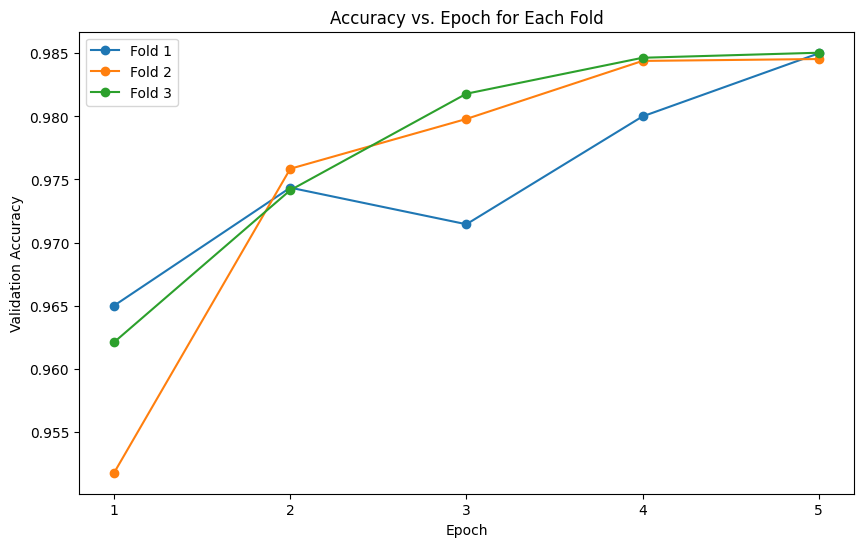

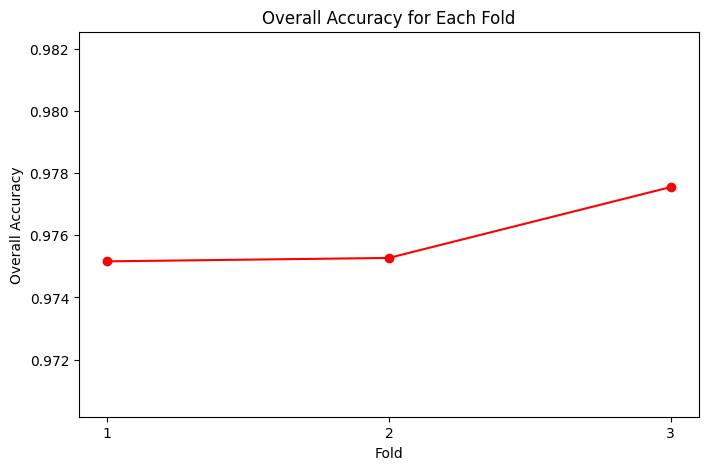

In [ ]:
# Plotting the accuracy versus epoch for each fold
plt.figure(figsize=(10, 6))
for i, val_acc in enumerate(validation_accuracies):
    plt.plot(np.arange(1, len(val_acc) + 1), val_acc, marker='o', linestyle='-', label=f'Fold {i + 1}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy vs. Epoch for Each Fold')
plt.legend()
plt.xticks(np.arange(1, len(val_acc) + 1))
plt.show()

# Calculate and plot overall accuracy for every fold
overall_accuracies = [np.mean(acc) for acc in validation_accuracies]
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, k_folds + 1), overall_accuracies, marker='o', linestyle='-', color='red')
plt.ylim(min(overall_accuracies) - 0.005, max(overall_accuracies) + 0.005)
plt.xlabel('Fold')
plt.ylabel('Overall Accuracy')
plt.title('Overall Accuracy for Each Fold')
plt.xticks(np.arange(1, k_folds + 1))
plt.show()
